In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

data = pd.read_table('training_data.txt',header=None,names=['query'])

data.head(10)

stop_words_df = pd.read_table('hinglish_stopwords.txt',header=None,names=['stop_word'])

stop_words_list = list(stop_words_df['stop_word'].str.lower())

In [102]:
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

words = []
words_processed=[]
for rec in data['query']:
    rec_updated = re.sub('\{.*\}','',rec)
    rec_updated = re.sub('[0-9]{1,15}','',rec_updated)
    rec_updated = re.sub('_.*_','',rec_updated)
    rec_updated = re.sub('[0-9]{2}/[0-9]{2}/[0-9]{4}','date',rec_updated)
    rec_updated = re.sub('[0-9]{1,2}:[0-9]{1,2} [a|p]m','time',rec_updated)        
    rec_updated = re.sub('[a|p]m','time',rec_updated)
    rec_updated = re.sub('(Jan(uary)?|Feb(ruary)?|Mar(ch)?|Apr(il)?|May|Jun(e)?|Jul(y)?|Aug(ust)?|Sep(tember)?|Oct(ober)?|Nov(ember)?|Dec(ember)?)',
                                               'date',rec_updated)
    words_processed.append(' '.join(word_tokenize(rec_updated)))
    words.append(' '.join(word_tokenize(rec)))

words_list = word_tokenize(' '.join(words))
words_list_processed= word_tokenize(' '.join(words_processed))

print('Total words ',len(words_list))
print('Total unique words ', len(set(words_list)))


Total words  406500
Total unique words  27788


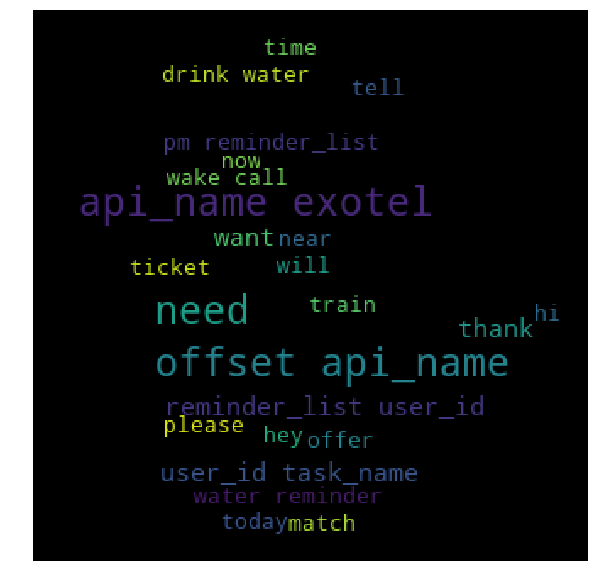

In [103]:
from PIL import Image

mask = np.array(Image.open('haptik_logo.jpg'))
wordcloud = WordCloud(width = 1000, height = 800,background_color ='black',
                      mode='RGBA',min_font_size = 10,mask=mask).generate(' '.join(words_list)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

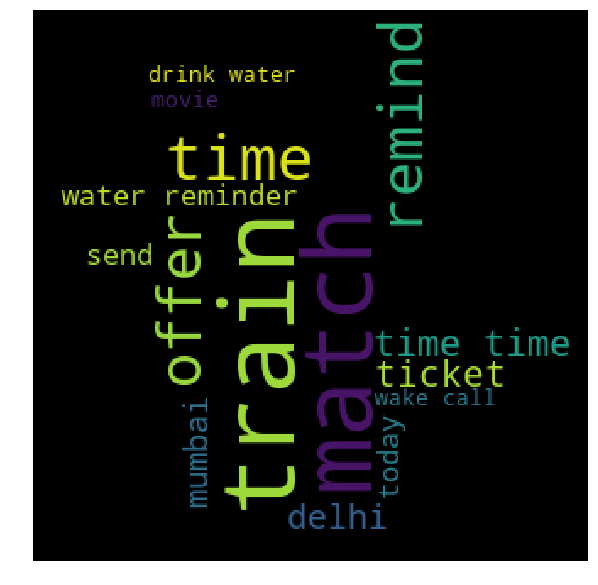

In [104]:
mask = np.array(Image.open('haptik_logo.jpg'))
wordcloud = WordCloud(width = 1000, height = 800,background_color ='black',mode='RGBA',
                      min_font_size = 10,stopwords=stop_words_list,mask=mask).generate(' '.join(words_list_processed)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [143]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Top 10 words list 
def calc_word_counts_without_pre(list_of_words):
    word_dict={}
    for sent in list_of_words:
        for word in word_tokenize(sent): 
            if word not in word_dict:
               word_dict[word] = 1
            else:
               word_dict[word] += 1
    return pd.Series(word_dict,index=word_dict.keys())

def calc_word_counts(list_of_words):
    words = []
    word_dict = {}

    for rec in list_of_words:
        rec_updated = re.sub('\{.*\}','',rec)
        rec_updated = re.sub('_.*_','',rec_updated)
        rec_updated = re.sub('[0-9]{1,15}','',rec_updated)
        rec_updated = re.sub('[0-9]{2}/[0-9]{2}/[0-9]{4}','',rec_updated)
        rec_updated = re.sub('[0-9]{1,2}:[0-9]{1,2} [a|p]m','',rec_updated)        
        rec_updated = re.sub('[a|p]m','',rec_updated)        
        rec_updated = re.sub('(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sep(tember)?|oct(ober)?|nov(ember)?|dec(ember)?)',
                                               '',rec_updated)
        words.append(' '.join(word_tokenize(rec_updated)))

    words_list = word_tokenize(' '.join(words))
        
    for word in words_list:
        if word.lower() not in stop_words_list and word.lower() not in category_list:
            if ps.stem(word) not in word_dict:
                word_dict[ps.stem(word)] = 1
            else:
                word_dict[ps.stem(word)] += 1
    return pd.Series(word_dict,index=word_dict.keys())


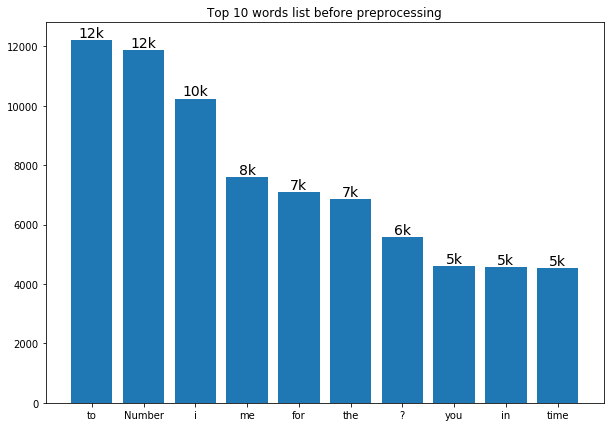

In [99]:
words_list_df = calc_word_counts_without_pre(data['query'])
plt.figure(figsize=(10,7))
plt.bar(words_list_df.sort_values(ascending=False)[:10].index,words_list_df.sort_values(ascending=False)[:10])
plt.title('Top 10 words list before preprocessing')
for a,b in zip(words_list_df.sort_values(ascending=False)[:10].index,words_list_df.sort_values(ascending=False)[:10]):
    plt.text(a,b,str(round(b/1000)) + 'k',color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

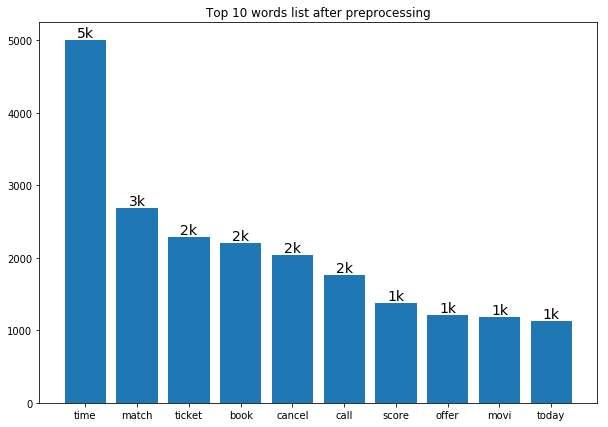

In [194]:
words_list_df = calc_word_counts(data['query'])
plt.figure(figsize=(10,7))
plt.bar(words_list_df.sort_values(ascending=False)[:10].index,words_list_df.sort_values(ascending=False)[:10])
plt.title('Top 10 words list after preprocessing')
for a,b in zip(words_list_df.sort_values(ascending=False)[:10].index,words_list_df.sort_values(ascending=False)[:10]):
    plt.text(a,b,str(round(b/1000)) + 'k',color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

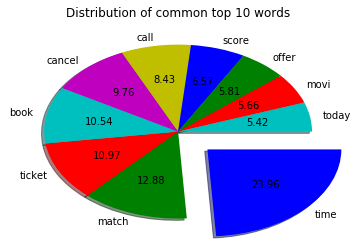

In [195]:
values = words_list_df.sort_values(ascending=False)[:10]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
explode = (0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors,autopct ="%.2f", labels= words_list_df.sort_values(ascending=False)[:10].index  ,explode=explode,counterclock=False, shadow=True)
plt.title('Distribution of common top 10 words')
plt.show()

In [128]:
def check_for_cities(sent):
    for word in sent.split(' '):
        if word.lower() in list(cities_df['city']):
           return word.lower()
    return np.nan

cities_df = pd.read_table('cities_list.txt',header=None,names=['city'])
cities_df['city'] = cities_df['city'].str.lower()

data['city'] = data['query'].apply(check_for_cities)

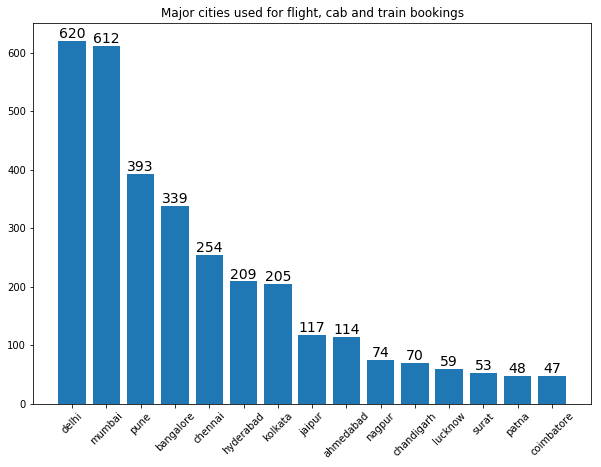

In [83]:
plt.figure(figsize=(10,7))
plt.title('Major cities used for flight, cab and train bookings')
plt.bar(data['city'].value_counts().head(15).index ,data['city'].value_counts().head(15)  )
plt.xticks(rotation=45)

for a,b in zip(data['city'].value_counts().head(15).index ,data['city'].value_counts().head(15) ):
    plt.text(a,b,str(round(b)) ,color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

In [138]:
import re 

def check_for_word(sent):
    for key,value in category_list.items():
        if re.search(key,sent):   
           return value
    return 'Outlier'
category_list = {'flight' : 'dr_flight',
                 'flights' : 'dr_flight',
                 'recharge':'dr_recharge',
                 'train' :'dr_train',
                 'trains' : 'dr_train',
                 'cab' : 'dr_cab' ,
                 'cabs' : 'dr_cab',
                 'reminder' :'dr_reminder',
                 'remainder' :'dr_reminder',
                 'reminders' : 'dr_reminder',
                 'remind' : 'dr_reminder',
                 'nearby':'dr_nearby',
                 'nearest':'dr_nearby',
                 'closest':'dr_nearby'
                }

data['category'] = data['query'].apply(check_for_word)

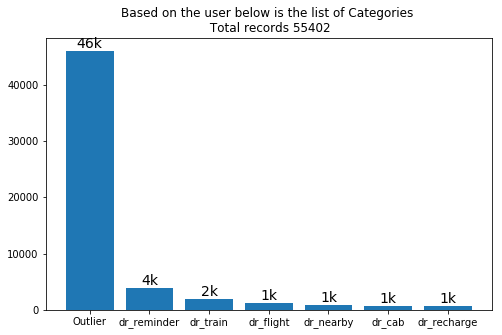

In [85]:
plt.figure(figsize=(8,5))
plt.title('Based on the user below is the list of Categories \n Total records ' + str(len(data['query'])))
plt.bar(data['category'].value_counts().index,data['category'].value_counts())

for a,b in zip(data['category'].value_counts().index,data['category'].value_counts()):
    plt.text(a,b,str(round(b/1000)) + 'k',color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

In [129]:
def check_details(sent):
    words_list = [ word.lower() for word in word_tokenize(sent)]
    for word in cancel_list:
        if word in words_list:
           return 'cancel'
    for word in set_list:
        if word in words_list:
            return 'set'
    for word in show_list:
        if word in words_list:
            return 'Info'
    
    return 'Other'
        
cancel_list = ['cancel','dont','stop','anymore','again','discontinue','remove','off',"n't",'close','delete','shut']
set_list = ['set','need','add','make','can','remind','wake','reminder','remainder']
show_list = ['show','list','view']

data_reminder = pd.DataFrame()

data_reminder['reminder_status'] = data.loc[data['category'] == 'dr_reminder','query'].apply(check_details)
data_reminder['query'] = data.loc[data['category'] == 'dr_reminder','query']

print('Total Reminder query  = ' , data_reminder['query'].count() )
print(data_reminder['reminder_status'].value_counts())

Total Reminder query  =  4275
cancel    2084
set       1931
Other      210
Info        50
Name: reminder_status, dtype: int64


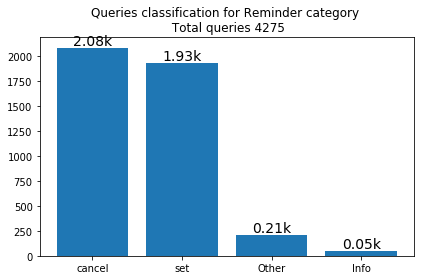

In [122]:
plt.title('Queries classification for Reminder category \n Total queries ' + str(data_reminder['query'].count()) )
plt.bar(data_reminder['reminder_status'].value_counts().index,data_reminder['reminder_status'].value_counts())
plt.tight_layout()

for a,b in zip(data_reminder['reminder_status'].value_counts().index,data_reminder['reminder_status'].value_counts()):
    plt.text(a,b,str(round(b/1000,2)) + 'k',color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

In [123]:
data_train = pd.DataFrame()

def check_details(sent):
    words_list = [ word.lower() for word in word_tokenize(sent)]
    for word in cancel_list:
        if word in words_list:
           return 'cancel'
    for word in set_list:
        if word in words_list:
            return 'set'
    for word in question_list:
        if word in words_list:
            return 'information'
    
    return 'Other'
        
cancel_list = ['cancel','dont','stop','anymore','again','discontinue','remove','off',"n't",'close']
set_list = ['set','need','add','make','book']
question_list = ['find','when','time','tell','?','give','know','check',
                 'want','what','get','availability','want','how'
                  'which','send','show','status','look','looking','chahiye'
                ]

data_train['train_status'] = data.loc[data['category'] == 'dr_train','query'].apply(check_details)
data_train['query'] = data.loc[data['category'] == 'dr_train','query']

print(data_train['train_status'].value_counts())

information    950
Other          742
set            195
cancel          63
Name: train_status, dtype: int64


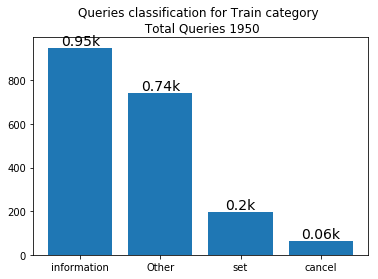

In [124]:
plt.title('Queries classification for Train category \n Total Queries ' + str(data_train['query'].count()))
plt.bar(data_train['train_status'].value_counts().index,data_train['train_status'].value_counts())

for a,b in zip(data_train['train_status'].value_counts().index,data_train['train_status'].value_counts()):
    plt.text(a,b,str(round(b/1000,2)) + 'k',color='black',fontsize=14,horizontalalignment='center',verticalalignment='bottom')

In [97]:
print(data_train.loc[data_train['train_status']=='Other','query'].head(5))
print(data_train.loc[data_train['train_status']=='Other','query'].tail(5))


11                                          for the train
45      . no refund shall be granted on the confirmed ...
353                                   i hve a train today
863     Any train available frm canacona (kankon) stat...
1070        is there any cashback on booking train ticket
Name: query, dtype: object
54132    Number train jalandhar se Jtimemu k liye sleep...
54196               which one is better by bus or by train
54256             is there any offer for booking train tkt
54270                        Hyderabad local train timings
54506    Hey tomo early morning is der any train for Hu...
Name: query, dtype: object


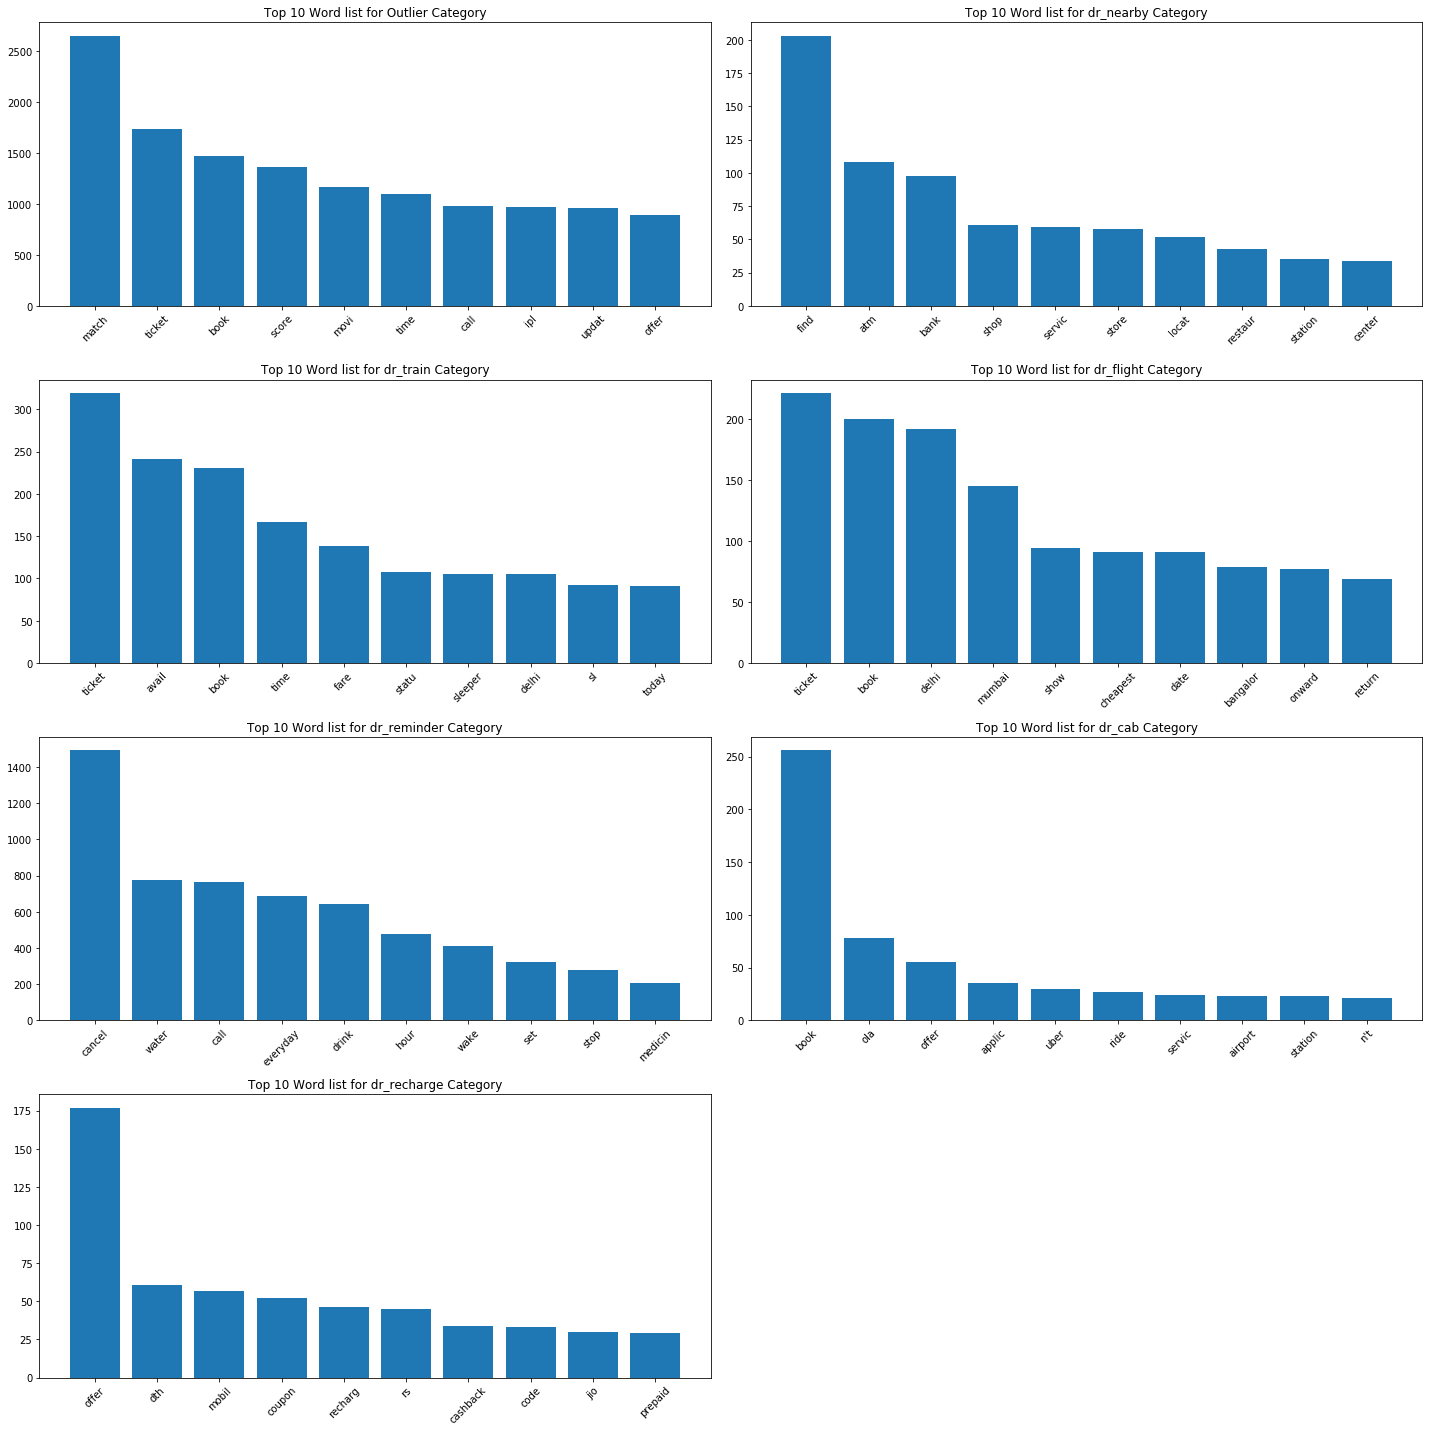

In [144]:
counter=1
plt.figure(figsize=(20,20))

for cat in data['category'].unique():
    word_count = calc_word_counts(data.loc[ data['category'] == cat , 'query'])
    plt.subplot(4,2,counter)
    plt.title('Top 10 Word list for '+ cat + ' Category')
    plt.bar(word_count.sort_values(ascending=False)[:10].index,word_count.sort_values(ascending=False)[:10])
    plt.xticks(rotation=45)
    plt.tight_layout()
    counter+=1

In [145]:
def preprocessing(data):
    data['query'] = data['query'].apply(lambda sent: re.sub('[0-9]{1,15}','Number',sent))
    data['query'] = data['query'].apply(lambda sent: re.sub('\{.*\}','',sent))
    data['query'] = data['query'].apply(lambda sent: re.sub('[0-9]{2}/[0-9]{2}/[0-9]{4}','date',sent))
    data['query'] = data['query'].apply(lambda sent: re.sub('[0-9]{4}/[0-9]{2}/[0-9]{2}','date',sent))
    data['query'] = data['query'].apply(lambda sent: re.sub('[0-9]{2} [a-zA-Z]{3} [0-9]{4}','date',sent))
    data['query'] = data['query'].apply(lambda sent: 
                                        re.sub('(Jan(uary)?|Feb(ruary)?|Mar(ch)?|Apr(il)?|May|Jun(e)?|Jul(y)?|Aug(ust)?|Sep(tember)?|Oct(ober)?|Nov(ember)?|Dec(ember)?)',
                                               'date',sent))
    
    data['query'] = data['query'].apply(lambda sent: re.sub('[a|p]m','time',sent))
    data['query'] = data['query'].apply(lambda sent: re.sub('_.*_','',sent))
    
    
    return data

data = preprocessing(data)


In [146]:
test_data = pd.read_csv('eval_data.csv')

test_data.columns = ['query','outlier']
test_data['outlier'] = test_data['outlier'].astype('int')

test_data = preprocessing(test_data)

test_data['category'] = test_data['query'].apply(check_for_word)

test_data.head()

,query,outlier,category
0,i want to buy mobile,1,Outlier
1,hey i want to buy headphones,1,Outlier
2,can you please guide me about share market,1,Outlier
3,then tell me the best and safest way to root m...,1,Outlier
4,ctimeera nt working,1,Outlier


<BarContainer object of 2 artists>

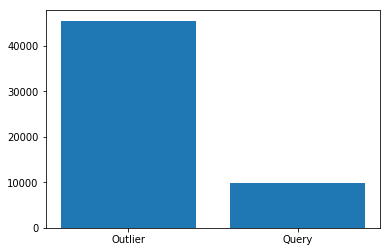

In [152]:
data['outlier'] = data['category'].apply(lambda x : 1 if x == 'Outlier' else 0 )  

plt.bar( ['Outlier','Query'] , data['outlier'].value_counts())

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

tfidf = TfidfVectorizer(stop_words=stop_words_list,max_features=200,lowercase=True)
os = SMOTE(random_state=0)

train_vector = tfidf.fit_transform(data['query'])
test_vector = tfidf.transform(test_data['query'])

x_train = pd.DataFrame(data=train_vector.toarray(), columns = tfidf.get_feature_names())
y_train = data['outlier']

#x_train = pd.concat([x_train,pd.get_dummies(data['category'])],axis=1)

x_test =  pd.DataFrame(data=test_vector.toarray(), columns = tfidf.get_feature_names())
y_test = test_data['outlier']

#x_test = pd.concat([x_test,pd.get_dummies(test_data['category'])],axis=1)

x_train,y_train = os.fit_sample(x_train, y_train)

lr = LogisticRegression(random_state=0,class_weight='balanced')
clf = GaussianNB()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('-'*100)
print('Logistic')
print('-'*100)
print('Score = ', lr.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('-'*100)
print('GaussianNB')
print('-'*100)
print('Score = ', lr.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))



----------------------------------------------------------------------------------------------------
Logistic
----------------------------------------------------------------------------------------------------
Score =  0.58819913952059
Confusion Matrix = 
 [[136 665]
 [  5 821]]
Classification report
              precision    recall  f1-score   support

          0       0.96      0.17      0.29       801
          1       0.55      0.99      0.71       826

avg / total       0.76      0.59      0.50      1627

----------------------------------------------------------------------------------------------------
GaussianNB
----------------------------------------------------------------------------------------------------
Score =  0.58819913952059
Confusion Matrix = 
 [[501 300]
 [551 275]]
Classification report
              precision    recall  f1-score   support

          0       0.48      0.63      0.54       801
          1       0.48      0.33      0.39       826

avg / total   

In [197]:
for tree_depth in [5,10,15,30,50]:
    svc =  DecisionTreeClassifier(random_state=0,max_depth=tree_depth)
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)

    print('-'*100)
    print('Decision tree classifier - Tree Depth ',tree_depth)
    print('-'*100)
    print('Score = ', svc.score(x_test,y_test))
    print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
    print('Classification report\n',classification_report(y_test,y_pred))


----------------------------------------------------------------------------------------------------
Decision tree classifier - Tree Depth  5
----------------------------------------------------------------------------------------------------
Score =  0.560540872771973
Confusion Matrix = 
 [[ 87 714]
 [  1 825]]
Classification report
              precision    recall  f1-score   support

          0       0.99      0.11      0.20       801
          1       0.54      1.00      0.70       826

avg / total       0.76      0.56      0.45      1627

----------------------------------------------------------------------------------------------------
Decision tree classifier - Tree Depth  10
----------------------------------------------------------------------------------------------------
Score =  0.5832821143208359
Confusion Matrix = 
 [[125 676]
 [  2 824]]
Classification report
              precision    recall  f1-score   support

          0       0.98      0.16      0.27       801
  

In [229]:
cv = CountVectorizer(stop_words=stop_words_list,max_features=500,min_df=5,lowercase=True,ngram_range=(1,2) )

train_vector = cv.fit_transform(data['query'])
test_vector = cv.transform(test_data['query'])

x_train = pd.DataFrame(data=train_vector.toarray(), columns = cv.get_feature_names())
y_train = data['outlier']

#x_train = pd.concat([x_train,pd.get_dummies(data['category'])],axis=1)

x_test =  pd.DataFrame(data=test_vector.toarray(), columns = cv.get_feature_names())
y_test = test_data['outlier']

#x_test = pd.concat([x_test,pd.get_dummies(test_data['category'])],axis=1)


lr.fit(x_train,y_train)

i =0
for val in lr.predict_proba(x_test)[:,1]:
    if val > 0.4:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    i+=1

print('Logistic')
print('*'*100)
print('Score = ', lr.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('GaussianNB')
print('*'*100)
print('Score = ', clf.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

print('Decision tree classifier')
print('*'*100)
print('Score = ', svc.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))


Logistic
****************************************************************************************************
Score =  0.5869698832206515
Confusion Matrix = 
 [[132 669]
 [  3 823]]
Classification report
              precision    recall  f1-score   support

          0       0.98      0.16      0.28       801
          1       0.55      1.00      0.71       826

avg / total       0.76      0.59      0.50      1627

0.5805810231157784
GaussianNB
****************************************************************************************************
Score =  0.5673017824216349
Confusion Matrix = 
 [[237 564]
 [140 686]]
Classification report
              precision    recall  f1-score   support

          0       0.63      0.30      0.40       801
          1       0.55      0.83      0.66       826

avg / total       0.59      0.57      0.53      1627

0.5631943121945027
Decision tree classifier
***********************************************************************************************

In [230]:
from sklearn.ensemble import VotingClassifier

svc.probability = True

models = [ ('Logistic' , lr),
            ('Naive Bayes' ,clf),
            ('Decision tree' , svc)
         ]
 
vt_clf = VotingClassifier(estimators = models,voting='soft')

vt_clf.fit(x_train,y_train)

y_pred = vt_clf.predict(x_test)

y_pred_vals = vt_clf.predict_proba(x_test)


print('Ensembling Voting Classifier')
print('-'*100)
print('Score = ', vt_clf.score(x_test,y_test))
print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
print('Classification report\n',classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))


Ensembling Voting Classifier
----------------------------------------------------------------------------------------------------
Score =  0.5869698832206515
Confusion Matrix = 
 [[132 669]
 [  3 823]]
Classification report
              precision    recall  f1-score   support

          0       0.98      0.16      0.28       801
          1       0.55      1.00      0.71       826

avg / total       0.76      0.59      0.50      1627

0.5805810231157784


In [228]:
for depth in [5,10,20,30,50]:
    xg = XGBClassifier(max_depth=depth,n_estimators=20) 

    xg.fit(x_train,y_train)

    y_pred = xg.predict(x_test)

    print('XGBoost Classifier -- Depth ',depth)
    print('-'*100)
    print('Score = ', xg.score(x_test,y_test))
    print('Confusion Matrix = \n',metrics.confusion_matrix(y_test,y_pred))
    print('Classification report\n',classification_report(y_test,y_pred))
    print('Ruc Auc Score ')
    print('-' * 100 )
    print(roc_auc_score(y_test,y_pred))


XGBoost Classifier -- Depth  5
----------------------------------------------------------------------------------------------------
Score =  0.5746773202212662
Confusion Matrix = 
 [[110 691]
 [  1 825]]
Classification report
              precision    recall  f1-score   support

          0       0.99      0.14      0.24       801
          1       0.54      1.00      0.70       826

avg / total       0.76      0.57      0.48      1627

Ruc Auc Score 
----------------------------------------------------------------------------------------------------
0.568058842911252
XGBoost Classifier -- Depth  10
----------------------------------------------------------------------------------------------------
Score =  0.5857406269207129
Confusion Matrix = 
 [[129 672]
 [  2 824]]
Classification report
              precision    recall  f1-score   support

          0       0.98      0.16      0.28       801
          1       0.55      1.00      0.71       826

avg / total       0.76      0.59   

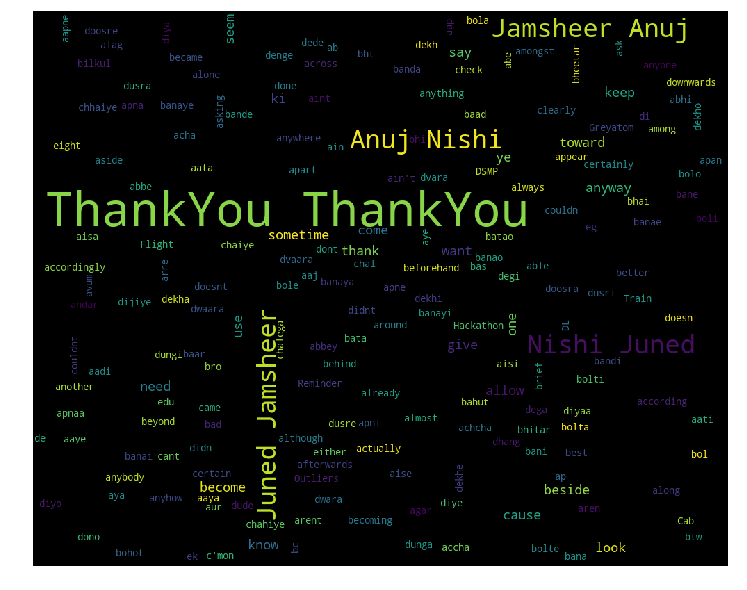

In [193]:
team_words = []

for member in [['Juned','Jamsheer','Anuj','Nishi']]:
    team_words.extend(member * 100)

for member in [['Flight','Reminder','Hackathon','Outliers','Cab','Train','Greyatom','DSMP','DL']]: 
    team_words.extend(member)
               
team_words.extend(['ThankYou'] * 1000)
team_words.extend(stop_words_list)

    
wordcloud = WordCloud(width = 1000, height = 800,background_color ='black',
                      min_font_size = 8).generate(' '.join(team_words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 